In [34]:
import csv
import math
import pydot

import networkx as nx

from collections import defaultdict
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.algorithms.traversal.depth_first_search import dfs_tree

In [18]:
graph_data = []
with open("../data/tsv/results/google_gemma-2-9b-it.csv", "r") as f:
    rows = csv.DictReader(f)
    for row in rows:
        concept1, concept2 = row['concept1'], row['concept2']
        if concept1 != concept2:
            graph_data.append((concept2, concept1, float(row['yes']) - float(row['no'])))

In [19]:
G = nx.DiGraph()
for c2, c1, w in graph_data:
    G.add_edge(c2, c1, weight=w)

In [20]:
G_tree = nx.maximum_spanning_arborescence(G)

In [27]:
def hierarchy_pos_no_recur(
    G, root, width=1.0, vert_gap=0.2, vert_loc=0, xcenter=0.5
):
    """If there is a cycle that is reachable from root, then result will not be a hierarchy.

    G: the graph
    root: the root node of current branch
    width: horizontal space allocated for this branch - avoids overlap with other branches
    vert_gap: gap between levels of hierarchy
    vert_loc: vertical location of root
    xcenter: horizontal location of root
    """

    def h_recur(
        G,
        root,
        width=1.0,
        vert_gap=0.2,
        vert_loc=0,
        xcenter=0.5,
        pos=None,
        parent=None,
        parsed=[],
    ):
        if root not in parsed:
            parsed.append(root)
            if pos == None:
                pos = {root: (xcenter, vert_loc)}
            else:
                pos[root] = (xcenter, vert_loc)
            neighbors = list(G.neighbors(root))
            if parent != None and parent in neighbors:
                neighbors.remove(parent)
            if len(neighbors) > 0:
                dx = width / len(neighbors)
                nextx = xcenter - width / 2 - dx / 2
                for neighbor in neighbors:
                    nextx += dx
                    pos = h_recur(
                        G,
                        neighbor,
                        width=dx,
                        vert_gap=vert_gap,
                        vert_loc=vert_loc - vert_gap,
                        xcenter=nextx,
                        pos=pos,
                        parent=root,
                        parsed=parsed,
                    )
        return pos

    return h_recur(G, root, width=1.0, vert_gap=0.2, vert_loc=0, xcenter=0.5)

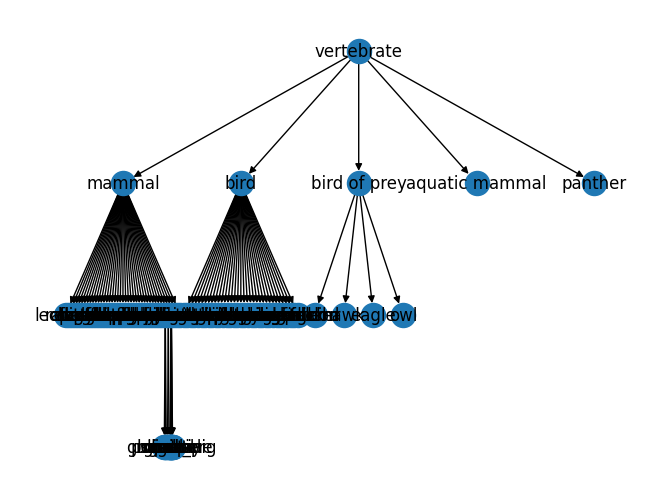

In [42]:
subroot = "vertebrate"
subtree = dfs_tree(G_tree, subroot)
# pos = nx.nx_agraph.graphviz_layout(subtree, prog="circo")
pos = hierarchy_pos_no_recur(subtree, subroot, width = 20, xcenter=1)
# new_pos = {u:(r*math.cos(theta),r*math.sin(theta)) for u, (theta, r) in pos.items()}
nx.draw(subtree, pos, with_labels=True)